In [22]:
"""
show test result of charge amp, data took by Robin
Aur: Jiancheng Zeng
Date: Feb 9, 2023
"""

'\nshow test result of charge amp, data took by Robin\nAur: Jiancheng Zeng\nDate: Feb 9, 2023\n'

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [80]:
#Function that Calculate Root Mean Square
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)
     
    #Calculate Mean
    mean = (square / (float)(n))
     
    #Calculate Root
    root = math.sqrt(mean)
     
    return root

#read data from
data = pd.read_csv('/home/jiancheng/GRAMS/Charge_preamp/2SK3557_0.5us_SigOn_acq1.csv', names=range(2), error_bad_lines = False, skiprows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#print(data)

V_in = 0.012    #input sqaure wave
E_Ar = 25    #Argon energy factor 25eV
C_in = 4e-12    #injection capacitor

#calculate energy-signal transfer variable, keV
Trans = E_Ar/(1.6e-19)*C_in*V_in/1000

#calculate each V equal to # of keV
V_T = Trans/max(data.loc[:,1])

#calculate rms
RMS = rmsValue(data.loc[:,1][0:3000], 3000)

#calculate FWHM
FWHM = RMS * 2.35 * V_T

print('Energy FWHM is ' + str(FWHM))


Energy FWHM is 92.12806328151218


/tmp/ipykernel_2609207/756597338.py:20: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/home/jiancheng/GRAMS/Charge_preamp/2SK3557_0.5us_SigOn_acq1.csv', names=range(2), error_bad_lines = False, skiprows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


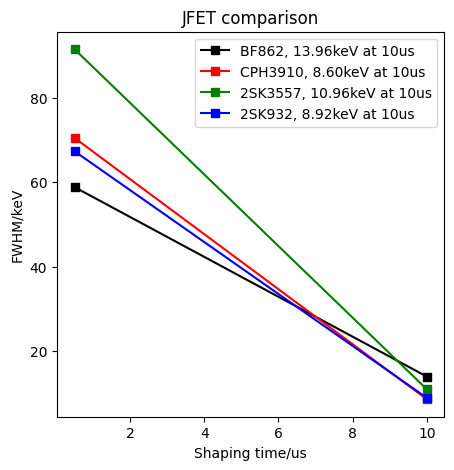

In [18]:
#BF862, shaping time [0.5us, 10us]
FWHM_1 = [58.8, 13.96]
#CPH3910, shaping time [0.5us, 10us]
FWHM_2 = [70.44, 8.60]
#2SK3557, shaping time [0.5us, 10us]
FWHM_3 = [91.43, 10.96]
#2SK932, shaping time [0.5us, 10us]
FWHM_4 = [67.29, 8.92]

fig = plt.figure(figsize = (5, 5))
ax1 = fig.add_subplot(111)

xx = [0.5, 10]
ax1.plot(xx, FWHM_1, c='k', marker="s", label='BF862, 13.96keV at 10us')
ax1.plot(xx, FWHM_2, c='r', marker="s", label='CPH3910, 8.60keV at 10us')
ax1.plot(xx, FWHM_3, c='g', marker="s", label='2SK3557, 10.96keV at 10us')
ax1.plot(xx, FWHM_4, c='b', marker="s", label='2SK932, 8.92keV at 10us')
#ax1.set_xticks([])
ax1.set_xlabel('Shaping time/us')
ax1.set_ylabel('FWHM/keV')
ax1.set_title('JFET comparison')

plt.legend()
plt.show()